In [1]:

## Data Manipulation
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
from pandas.tseries.offsets import MonthEnd
import tensorflow as tf


## Plotting
import seaborn as sns
import matplotlib.pyplot as plt

## Custom 
from elexon import ElexonRawClient
print(tf.__version__)

## ARIMA stuff
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

2.3.0


In [54]:


api = ElexonRawClient('k62su1yu4pcft7j') 

'''# Actual Aggregated Generation per Type
generation1 = api.Transparency.B1620(SettlementDate = '2020-01-01', Period = '5')
# Alternatively, use the general request() function by passing the endpoint in with the arguments:
generation2 = api.request('B1620', SettlementDate = '2020-01-01', Period = '5')'''

"# Actual Aggregated Generation per Type\ngeneration1 = api.Transparency.B1620(SettlementDate = '2020-01-01', Period = '5')\n# Alternatively, use the general request() function by passing the endpoint in with the arguments:\ngeneration2 = api.request('B1620', SettlementDate = '2020-01-01', Period = '5')"

In [ ]:
Alternatively, use the general request() function by passing the endpoint in with the arguments:
generation2 = api.request('B1620', SettlementDate = '2020-01-01', Period = '5')

In [3]:

now = datetime.now() 
now.strftime("%Y-%m-%d")
now

datetime.datetime(2020, 8, 19, 14, 48, 39, 585026)

In [4]:
start = '2010-01-01'
end = '2020-05-31'

In [22]:
def date_ranger(start, end):
    for beg in pd.date_range(start, end, freq='MS'):
        print(beg.strftime("%Y-%m-%d"), (beg + MonthEnd(1)).strftime("%Y-%m-%d"))

In [23]:
date_ranger(start, '2019-05-31')

2019-01-01 2019-01-31
2019-02-01 2019-02-28
2019-03-01 2019-03-31
2019-04-01 2019-04-30
2019-05-01 2019-05-31


In [24]:
prices_since_date = []

def price_getter(start, end):
    # Put in start of and end of motnh (i.e 31st etc)
    for date in pd.date_range(start, end, freq='MS'):
        date = api.request('DERSYSDATA',FromSettlementDate = date.strftime("%Y-%m-%d"), 
                                     ToSettlementDate = (date + MonthEnd(1)).strftime("%Y-%m-%d"))
        prices_since_date.append(date)
        

In [25]:
price_getter('2019-01-01', '2019-05-31')

In [26]:
def dataframe_maker():
    global df
    for i in range(1,len(prices_since_date)):
        s = prices_since_date[0]
        s += prices_since_date[i]
        df = pd.DataFrame(s)
    return df

In [27]:
df = dataframe_maker()

In [28]:
df['settlementDate'].nunique()

151

In [29]:
# Number of entries
len(df)

7246

In [30]:
df

,recordType,settlementDate,settlementPeriod,systemSellPrice,systemBuyPrice,bSADDefault,priceDerivationCode,reserveScarcityPrice,indicativeNetImbalanceVolume,sellPriceAdjustment,...,totalSystemAcceptedBidVolume,totalSystemTaggedAcceptedOfferVolume,totalSystemTaggedAcceptedBidVolume,totalSystemAdjustmentSellVolume,totalSystemAdjustmentBuyVolume,totalSystemTaggedAdjustmentSellVolume,totalSystemTaggedAdjustmentBuyVolume,activeFlag,replacementPrice,replacementPriceCalculationVolume
0,SSB,2019-01-01,1,15.0,15.0,F,N,NULL,-1058.3066,0.0,...,-1588.366,743.917,-1588.318,-614.0,400.0,-613.048,400.0,True,NaN,NaN
1,SSB,2019-01-01,2,15.0,15.0,F,N,NULL,-664.2875,0.0,...,-1063.104,613.651,-1063.056,-614.0,400.0,-613.048,400.0,True,NaN,NaN
2,SSB,2019-01-01,3,16.0,16.0,F,N,NULL,-1033.9092,0.0,...,-1085.368,445.008,-1084.625,-794.0,400.0,-793.743,400.0,True,16.0,1.0
3,SSB,2019-01-01,4,16.0,16.0,F,N,NULL,-1319.3434,0.0,...,-1308.652,382.942,-1307.885,-794.0,400.0,-793.767,400.0,True,16.0,1.0
4,SSB,2019-01-01,5,16.0,16.0,F,N,NULL,-1180.8583,0.0,...,-988.148,201.290,-987.519,-794.0,400.0,-793.629,400.0,True,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,SSB,2019-05-31,44,15.0,15.0,F,N,0,-365.4770,0.0,...,-686.356,625.879,-685.356,-305.0,0.0,-305.000,0.0,True,NaN,NaN
7242,SSB,2019-05-31,45,15.0,15.0,F,N,0,-600.4411,0.0,...,-908.665,918.634,-907.665,-610.5,0.0,-610.500,0.0,True,NaN,NaN
7243,SSB,2019-05-31,46,15.0,15.0,F,N,0,-671.0877,0.0,...,-1113.507,1052.920,-1112.507,-610.5,0.0,-610.500,0.0,True,NaN,NaN
7244,SSB,2019-05-31,47,48.0,48.0,F,P,NULL,333.1394,0.0,...,-842.436,1060.993,-842.436,-885.5,999.0,-885.500,999.0,True,NaN,NaN


In [33]:
date_time = pd.to_datetime(df['settlementDate'], format='%Y-%m-%d %H:%M:%S')

In [34]:
date_time 

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
7241   2019-05-31
7242   2019-05-31
7243   2019-05-31
7244   2019-05-31
7245   2019-05-31
Name: settlementDate, Length: 7246, dtype: datetime64[ns]

In [38]:
# Change to make new datetime object based on settlement period frequency (30 mins)

dates = pd.date_range(start=start,periods=len(df), freq='30T') 

In [39]:
df.index = dates

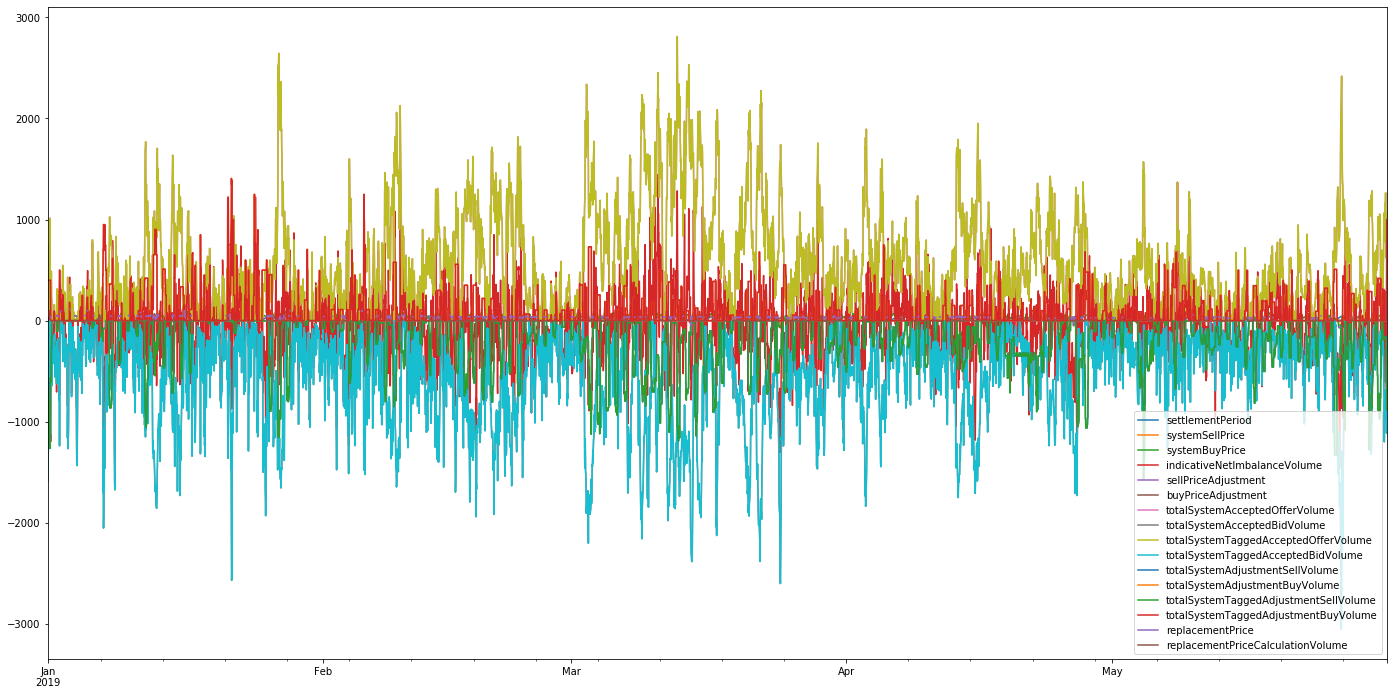

In [40]:
df.plot(figsize = (24,12))

In [41]:
df_prices = pd.concat([df['systemSellPrice'],
                                df['systemBuyPrice'],
                                df['indicativeNetImbalanceVolume']], 
                               axis = 1)

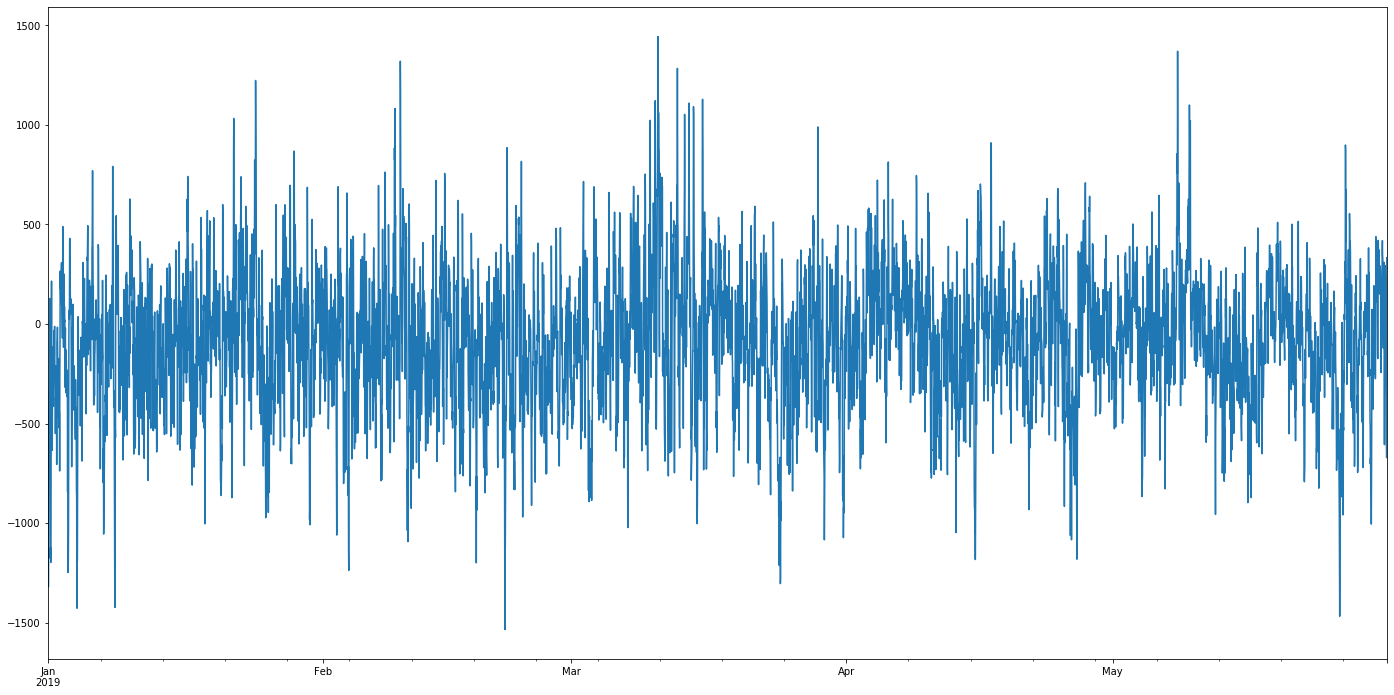

In [43]:
df_prices['indicativeNetImbalanceVolume'].plot(figsize = (24,12))

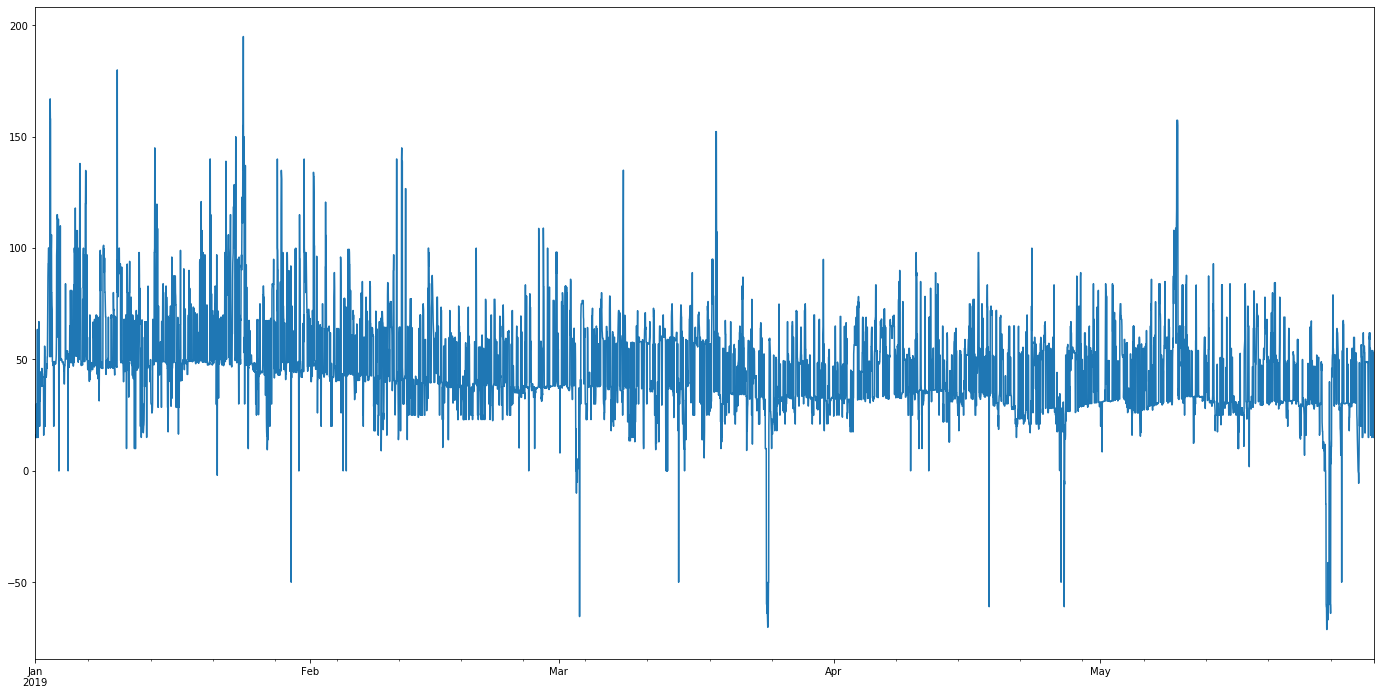

In [44]:
df_prices['systemSellPrice'].plot(figsize = (24,12))

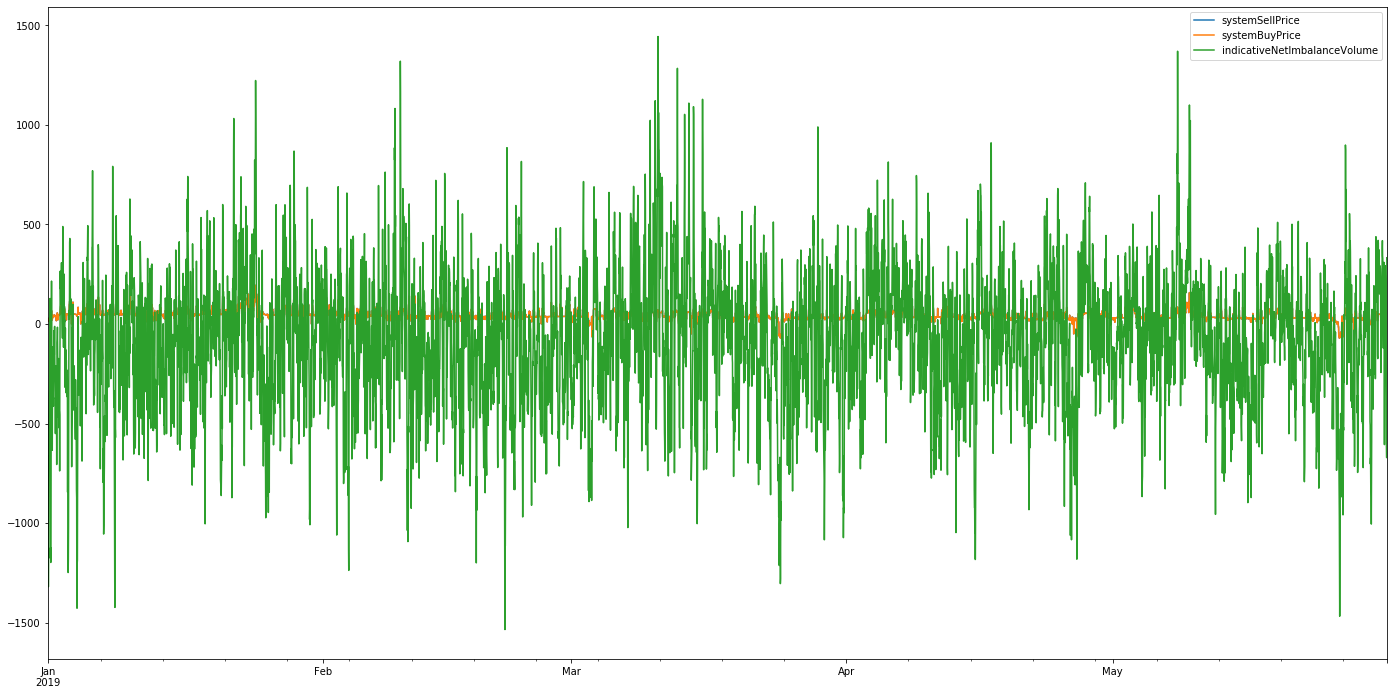

In [45]:
df_prices.plot(figsize = (24,12))

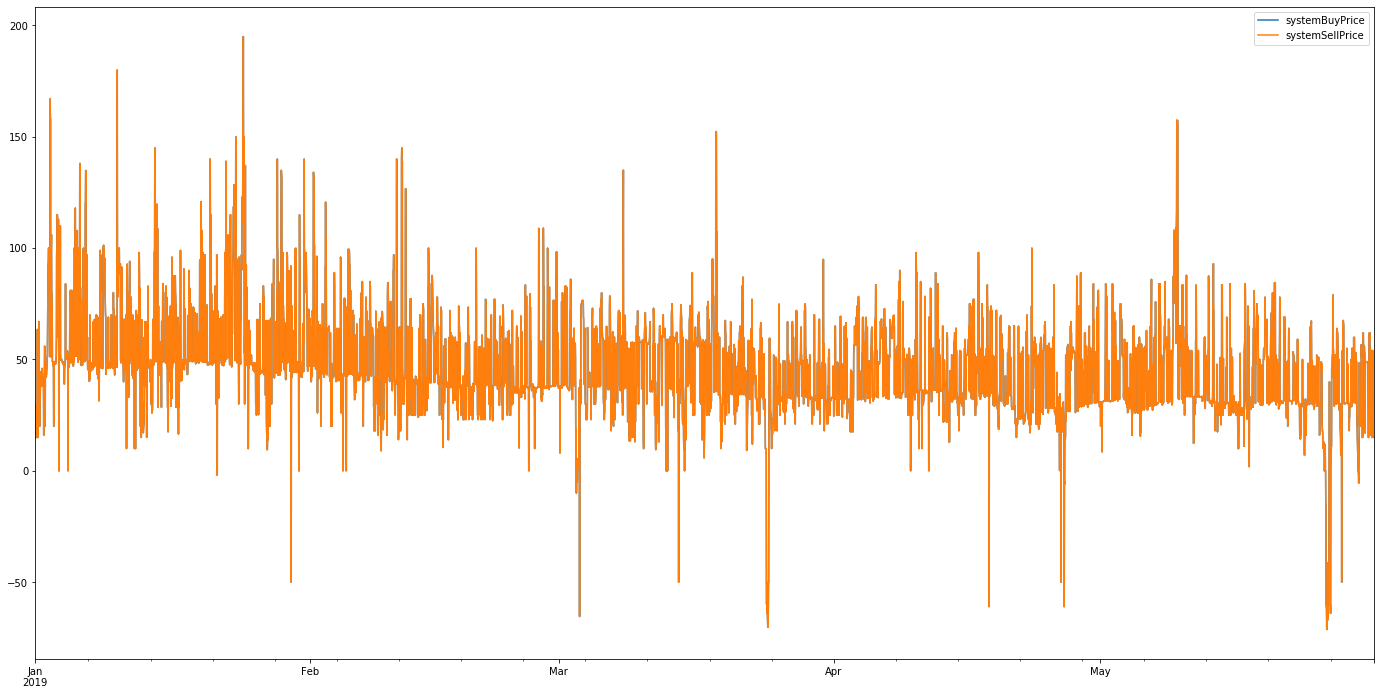

In [46]:
df_prices[['systemBuyPrice','systemSellPrice']].plot(figsize = (24,12))

In [47]:
# Dropping system buy price for now...

df_prices = df_prices.drop('systemBuyPrice', axis = 1)

In [48]:
# In this case buy price and sell prices are the same... I guess we would see any discrpancies

In [49]:
# Feature engineering...

Text(0, 0.5, 'Net Imbalance Vol')

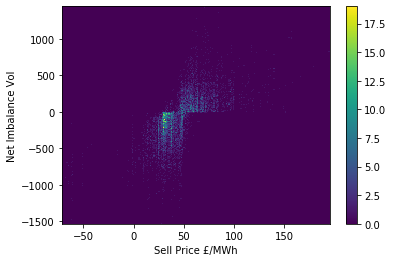

In [53]:
plt.hist2d(df_prices['systemSellPrice'],df_prices['indicativeNetImbalanceVolume'], bins=(250, 250))
plt.colorbar()
plt.xlabel('Sell Price £/MWh')
plt.ylabel('Net Imbalance Vol')

In [238]:
# Doing Modelling